In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./wine_fraud.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [3]:
df["quality"].unique()

array(['Legit', 'Fraud'], dtype=object)

<Axes: xlabel='quality', ylabel='count'>

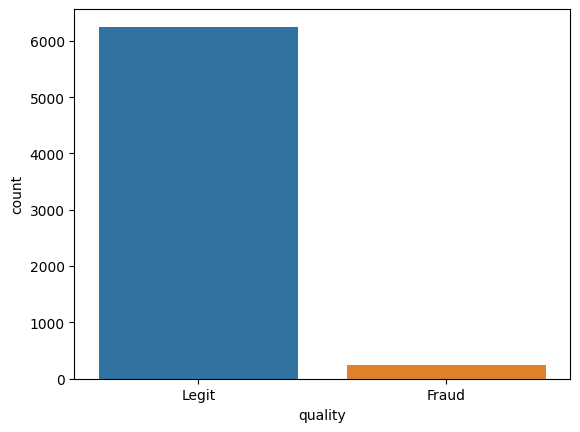

In [4]:
sns.countplot(data=df, x="quality")

<Axes: xlabel='quality', ylabel='count'>

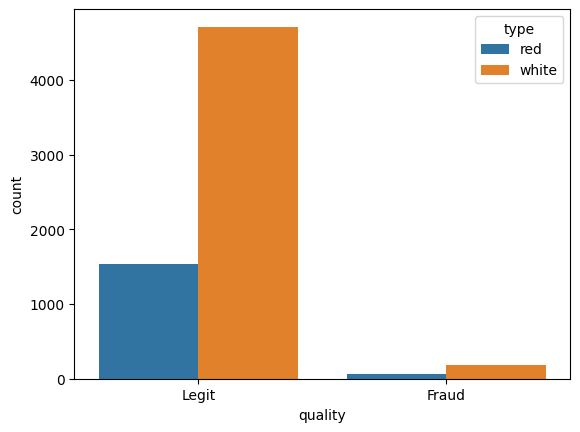

In [5]:
sns.countplot(data=df, x="quality", hue="type")

In [6]:
100 * len(df[(df["type"] == "red") & (df["quality"] == "Fraud")]) / len(df[df["type"] == "red"]), 100 * len(df[(df["type"] == "white") & (df["quality"] == "Fraud")]) / len(df[df["type"] == "white"])

(3.9399624765478425, 3.736218864842793)

In [7]:
df["quality"] = [0 if i=="Fraud" else 1 for i in df["quality"]]

In [8]:
df.corr()["quality"]

C:\Users\MMucahitNAS\AppData\Local\Temp\ipykernel_10532\235197352.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["quality"]


fixed acidity          -0.021794
volatile acidity       -0.151228
citric acid             0.061789
residual sugar          0.048756
chlorides              -0.034499
free sulfur dioxide     0.085204
total sulfur dioxide    0.035252
density                -0.016351
pH                     -0.020107
sulphates               0.034046
alcohol                 0.051141
quality                 1.000000
Name: quality, dtype: float64

C:\Users\MMucahitNAS\AppData\Local\Temp\ipykernel_10532\3192885367.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['quality'][:-1].sort_values().plot(kind='bar')


<Axes: >

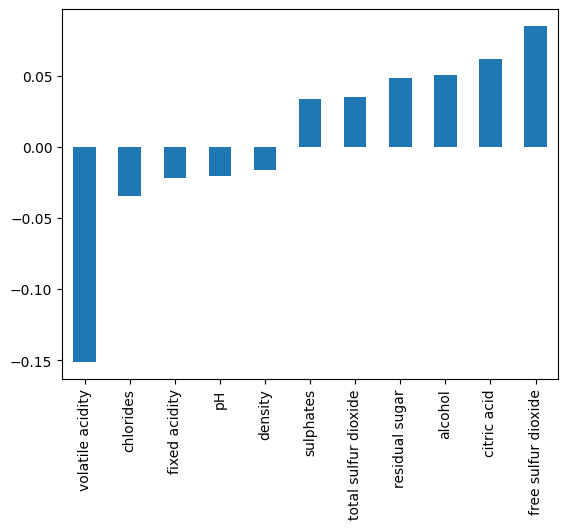

In [9]:
df.corr()['quality'][:-1].sort_values().plot(kind='bar')

C:\Users\MMucahitNAS\AppData\Local\Temp\ipykernel_10532\3528602217.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr(), annot=True, linecolor="green", linewidths=1, fmt=".2f")


<Axes: >

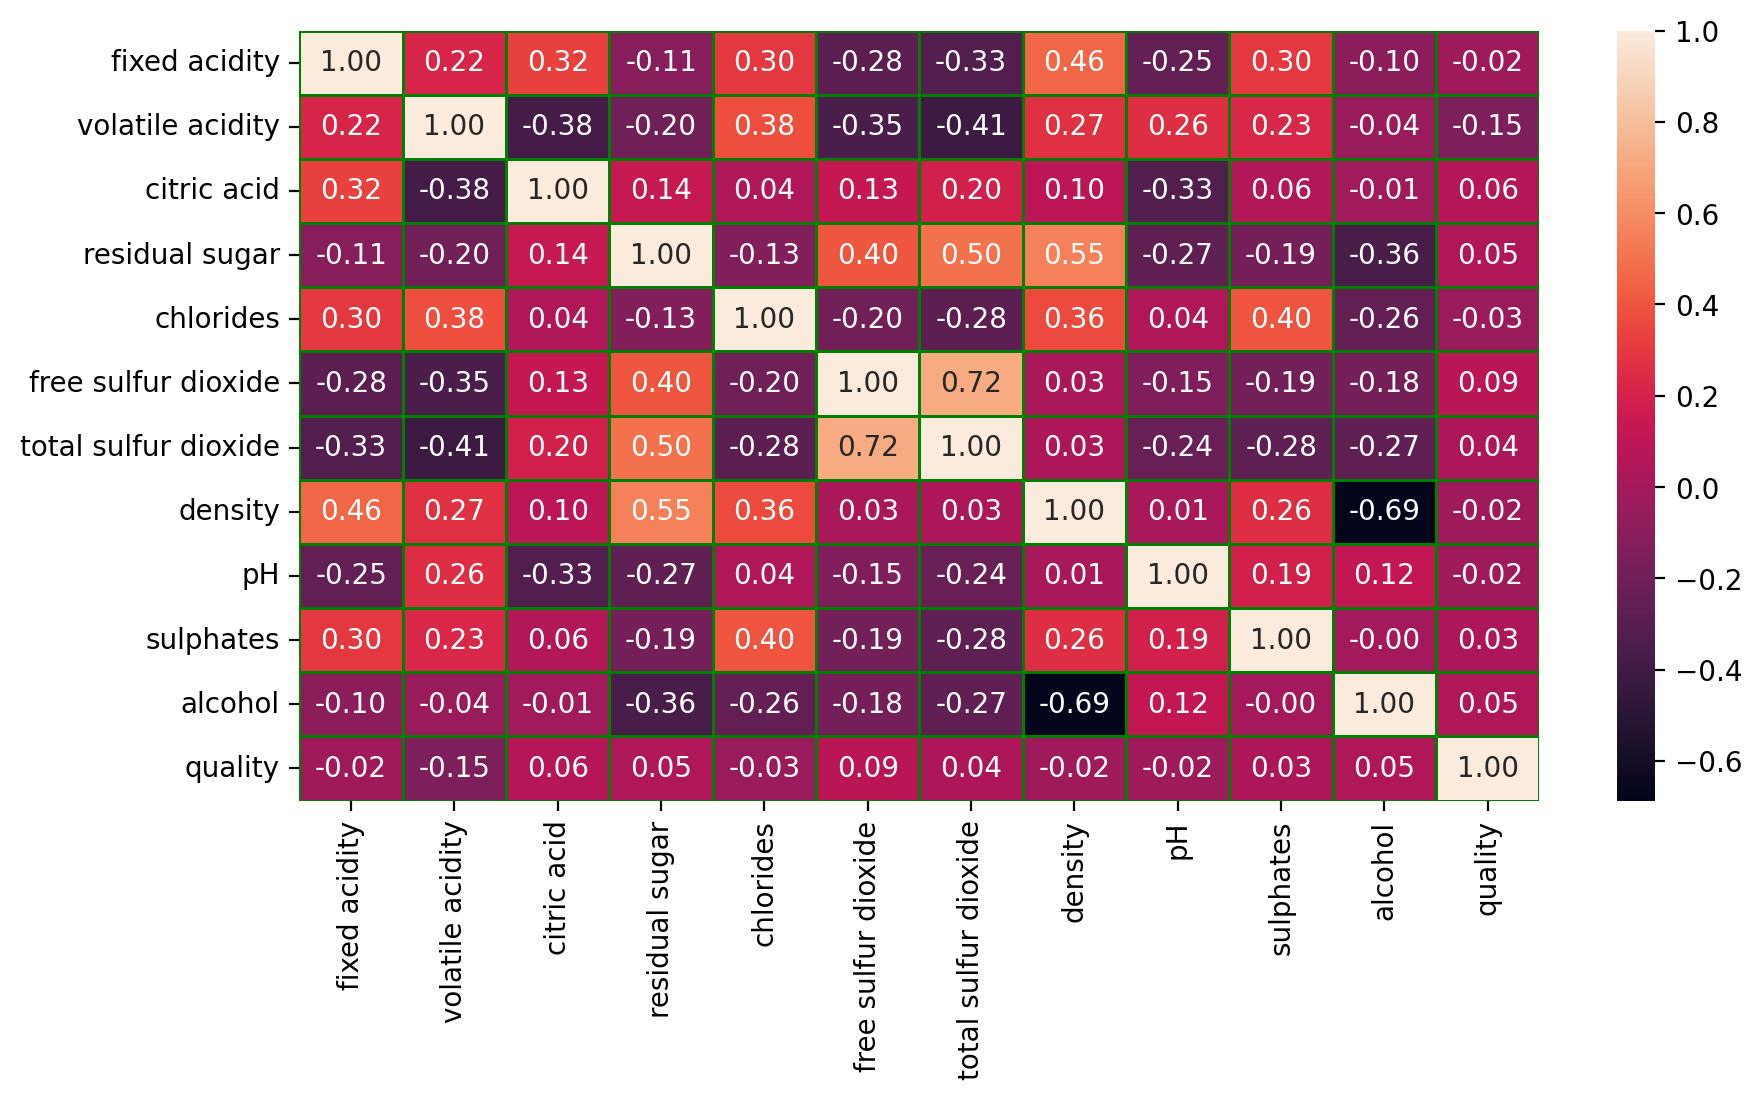

In [13]:
plt.figure(figsize=(10, 5), dpi=200)
sns.heatmap(data=df.corr(), annot=True, linecolor="green", linewidths=1, fmt=".2f")

In [14]:
df_str = pd.get_dummies(df["type"], drop_first=True)
df_str.head()

,white
0,0
1,0
2,0
3,0
4,0


In [15]:
df.drop("type", axis=1, inplace=True)

In [16]:
df = pd.concat([df, df_str], axis=1)

In [17]:
X = df.drop("quality", axis=1)
y = df["quality"]

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
from sklearn.svm import SVC
svc = SVC(class_weight="balanced")

In [21]:
from sklearn.model_selection import GridSearchCV
param_grid = {"C": [0.001, 0.01, 0.1, 0.5, 1],
              "gamma": ["scale", "auto"],
              "kernel": ["linear", "rbf", "poly"],
              "degree":[1, 2, 3, 4]}

In [22]:
grid_model = GridSearchCV(svc, param_grid)

In [23]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'degree': [1, 2, 3, 4], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [24]:
grid_model.best_estimator_.get_params()

{'C': 0.001,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [26]:
y_preds = grid_model.predict(scaled_X_test)

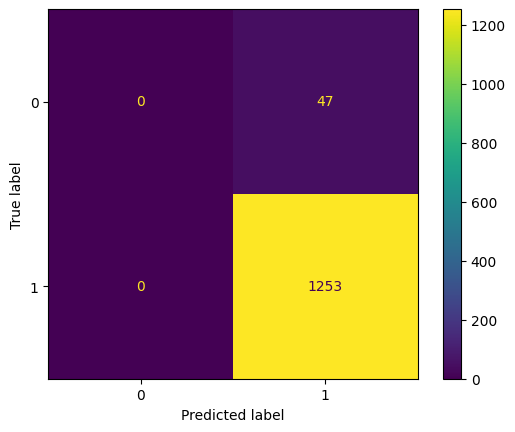

In [27]:
disp = ConfusionMatrixDisplay(confusion_matrix(y_test, y_preds))
disp.plot()

In [28]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.96      1.00      0.98      1253

    accuracy                           0.96      1300
   macro avg       0.48      0.50      0.49      1300
weighted avg       0.93      0.96      0.95      1300



c:\Users\MMucahitNAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MMucahitNAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\MMucahitNAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa